# Deep Q-Network for Cart-Pole.

In this assignment you are required to implement a Deep Q-Network agent, for the Cart-Pole problem.

You need to submit your code, along with a plot of the rewards during training, and a video of an episode with the trained agent.


**Submitters:**

Najah Kamal - 325829133

Salam Qais - 327876116



__Frameworks__ - we'll accept this homework in any deep learning framework. This particular notebook was designed for PyTorch, but you'll find it easy to adapt it to almost any Python-based deep learning framework.

In [1]:
!pip install stable-baselines3 gym==0.22.0
!pip install pyglet==1.5.27
!pip install pyvirtualdisplay

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.1/182.1 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.1/631.1 kB 32.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 41.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 36.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import os
import random
import numpy as np
import torch
import gym
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay
from pyvirtualdisplay import Display

if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY")) == 0:
    !apt-get -qq install -y xvfb
    os.environ['DISPLAY'] = ':1'

display = Display(visible=0, size=(400, 300))
display.start()


Selecting previously unselected package libfontenc1:amd64.
(Reading database ... 121753 files and directories currently installed.)
Preparing to unpack .../0-libfontenc1_1%3a1.1.4-1build3_amd64.deb ...
Unpacking libfontenc1:amd64 (1:1.1.4-1build3) ...
Selecting previously unselected package libxfont2:amd64.
Preparing to unpack .../1-libxfont2_1%3a2.0.5-1build1_amd64.deb ...
Unpacking libxfont2:amd64 (1:2.0.5-1build1) ...
Selecting previously unselected package libxkbfile1:amd64.
Preparing to unpack .../2-libxkbfile1_1%3a1.1.0-1build3_amd64.deb ...
Unpacking libxkbfile1:amd64 (1:1.1.0-1build3) ...
Selecting previously unselected package x11-xkb-utils.
Preparing to unpack .../3-x11-xkb-utils_7.7+5build4_amd64.deb ...
Unpacking x11-xkb-utils (7.7+5build4) ...
Selecting previously unselected package xfonts-encodings.
Preparing to unpack .../4-xfonts-encodings_1%3a1.0.5-0ubuntu2_all.deb ...
Unpacking xfonts-encodings (1:1.0.5-0ubuntu2) ...
Selecting previously unselected package xfonts-util

## Cart Pole

In this environment a pole is attached by an un-actuated joint to a cart, which moves along a frictionless track. The pendulum is placed upright on the cart and the goal is to balance the pole by applying forces in the left and right direction on the cart.

The observation consists of the cart position, cart velocity, pole angle and pole angular velocity.

There are 2 actions corresponding to moving the cart to the left and to the right.

See full description [here](https://www.gymlibrary.dev/environments/classic_control/cart_pole/).



In [3]:
ENV_NAME = "CartPole-v0"

def make_env(seed=None):
    # some envs are wrapped with a time limit wrapper by default
    env = gym.make(ENV_NAME).unwrapped
    if seed is not None:
        env.seed(seed)
    return env

/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:505: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1` with the environment ID `CartPole-v1`.
  logger.warn(


observation dim (4,) number of actions 2


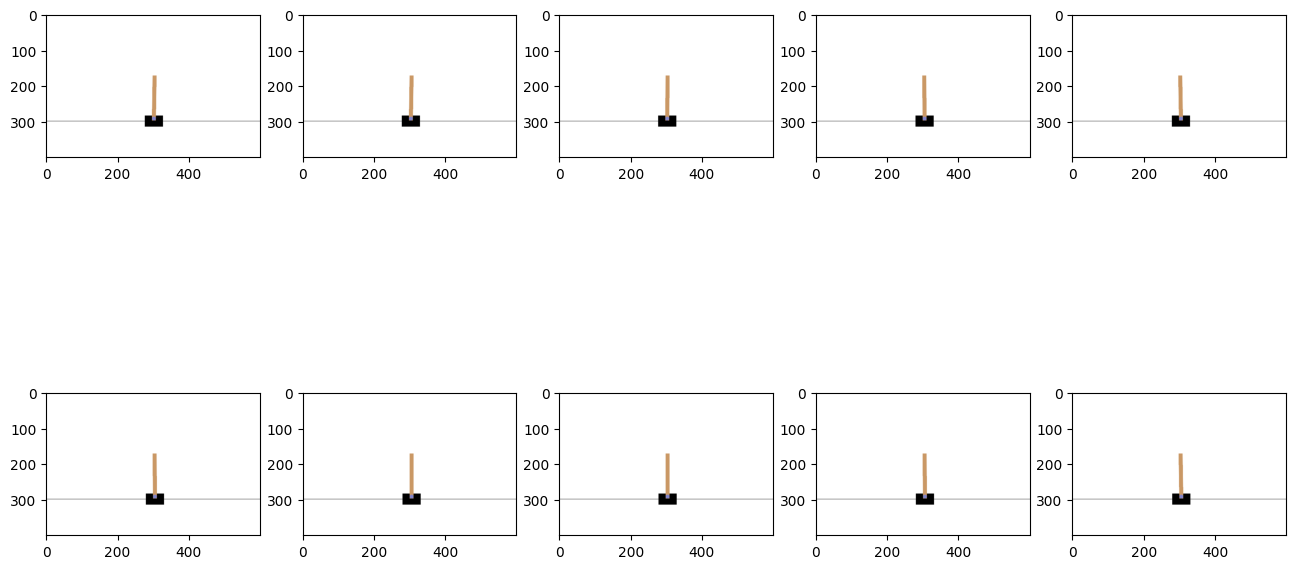

In [4]:
env = gym.make(ENV_NAME)
obs = env.reset()


n_actions = env.action_space.n
obs_dim = obs.shape
print("observation dim", obs_dim, "number of actions", n_actions)

n_cols = 5
n_rows = 2
fig = plt.figure(figsize=(16, 9))

for row in range(n_rows):
    for col in range(n_cols):
        ax = fig.add_subplot(n_rows, n_cols, row * n_cols + col + 1)
        ax.imshow(env.render('rgb_array'))
        env.step(env.action_space.sample())
plt.show()

## Random Agent

Here we implement a random agent to use in the 'evaluate' function, that runs the agent through multiple epsiodes.

## Assignment

Implement a DQN agent that contains:
1. A neural network that predicts the q-values for a given observation.
2. An experience replay buffer where all transitions are added.
3. A target Q-network that is formed by periodically copying the weights of the main Q-nework.

You will also need to implement the training loop, and submit a figure showing the reward as a function of the training step, and a video showing an episode with the trained agent.

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as T
import math
ENV_NAME = "CartPole-v0"
import matplotlib
import matplotlib.pyplot as plt
def make_env(seed=None):
    # some envs are wrapped with a time limit wrapper by default
    env = gym.make(ENV_NAME).unwrapped
    if seed is not None:
        env.seed(seed)
    return env

env = gym.make(ENV_NAME)
decay_rate = 1000
MIN_EPS = 0.05
MAX_EPS = 0.8
tau = 0.005
discount = 0.98
max_steps = 10000
lr =  0.001
batch_size = 64

obs = env.reset()


n_actions = env.action_space.n
n_obs = obs.shape[0]
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:505: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1` with the environment ID `CartPole-v1`.
  logger.warn(


In [6]:
is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display

plt.ion()


def plot(episodes_reward_list, show_result=False):
    plt.figure(1)
    rewards_t = torch.tensor(episodes_reward_list, dtype=torch.float)
    plt.title('Training Process')
    plt.xlabel('Episode')
    plt.ylabel('Rewards')
    plt.plot(rewards_t.numpy(), color='red')  # Red color for reward plot

    # Plotting the average reward of the last 100 episdos
    if len(rewards_t) >= 100:
        means = rewards_t.unfold(0, 100, 1).mean(1).view(-1)
        means = torch.cat((torch.zeros(99), means))
        plt.plot(means.numpy(), color='blue')  # Blue color for mean plot

    plt.pause(0.005)
    if is_ipython:
          display.display(plt.gcf())
          display.clear_output(wait=True)


In [7]:
class DQN(nn.Module):

  def __init__(self, n_obs , n_actions):
    super(DQN, self).__init__()
    self.l1 = nn.Linear(n_obs, 128)
    self.l2 = nn.Linear(128, 128)
    self.l3 = nn.Linear(128, n_actions)

  def forward(self, x):
    x= self.l1(x)
    x = F.relu(x)
    x=self.l2(x)
    x = F.relu(x)
    return self.l3(x)

In [8]:
class Agent:

  def __init__(self, actions_num):
    self.actions_num = actions_num
    self.steps_num = 0
    self.epsilon = MAX_EPS

  def step(self, state, behave_DQN, env, test = False):
    epsilon = MIN_EPS + (MAX_EPS - MIN_EPS) * math.exp(-1. * self.steps_num / decay_rate)
    self.epsilon = epsilon
    self.steps_num += 1
    state = torch.from_numpy(state).to(device)
    # Epsilon greedy
    action_prob = random.random()
    if(action_prob <= self.epsilon and not test):   # Randomly
      return env.action_space.sample()
    else:   # Greedy
      with torch.no_grad():
        return behave_DQN(state).argmax(axis=-1).item()


In [9]:

class Train:

  def __init__(self, env, n_obs, n_actions, device):
    self.env = env
    self.agent = Agent(n_actions)
    self.behave_DQN = DQN(n_obs, n_actions).to(device)
    self.target_DQN = DQN(n_obs, n_actions).to(device)
    self.target_DQN.load_state_dict(self.behave_DQN.state_dict())
    self.device = device
    self.optimizer = torch.optim.AdamW(self.behave_DQN.parameters(), lr)
    self.replay_buffer =  []


  def optimize(self):
    if(len(self.replay_buffer) < batch_size ):   # There is no enough experinces
      return

    experiences = random.sample(self.replay_buffer, batch_size)
    simulation_state, simulation_next_state, simulation_action, simulation_reward, if_terminated  = zip(*experiences)

    simulation_state = torch.FloatTensor(np.array(simulation_state)).squeeze(1).to(self.device)
    simulation_next_state = torch.FloatTensor(np.array(simulation_next_state)).squeeze(1).to(self.device)
    simulation_action = torch.Tensor(simulation_action).unsqueeze(1).to(self.device)
    simulation_reward = torch.Tensor(simulation_reward).unsqueeze(1).to(self.device)
    if_terminated  = torch.FloatTensor(if_terminated ).unsqueeze(1).to(self.device)

    with torch.no_grad():
        predict_tg = self.target_DQN(simulation_next_state)
        y = simulation_reward + (1 - if_terminated ) * discount * torch.max(predict_tg, dim=1, keepdim=True)[0]

    loss = F.mse_loss(self.behave_DQN(simulation_state).gather(1, simulation_action.long()), y)
    self.optimizer.zero_grad()
    loss.backward()
    self.optimizer.step()

    target_net_state_dict = self.target_DQN.state_dict()
    policy_net_state_dict = self.behave_DQN.state_dict()

    for key in policy_net_state_dict:
        target_net_state_dict[key] = policy_net_state_dict[key] * tau + target_net_state_dict[key] * (1 - tau)
    self.target_DQN.load_state_dict(target_net_state_dict)


  def train(self, num_episodes):
    self.episodes_reward_list = []
    for episode in range(1, num_episodes + 1):

      obs = self.env.reset()
      steps_num =0

      for _ in range(max_steps):
        action = self.agent.step(obs, self.behave_DQN, self.env)

        next_state, reward, done, _ = self.env.step(action)
        steps_num += 1
        self.replay_buffer.append(((obs, next_state, torch.FloatTensor([[action]]).to(self.device), torch.FloatTensor([[reward]]).to(self.device), torch.FloatTensor([[done]]).to(self.device))))
        self.optimize()

        if(done == True):
          break
        obs = next_state
      self.episodes_reward_list.append(steps_num)
      plot(self.episodes_reward_list)


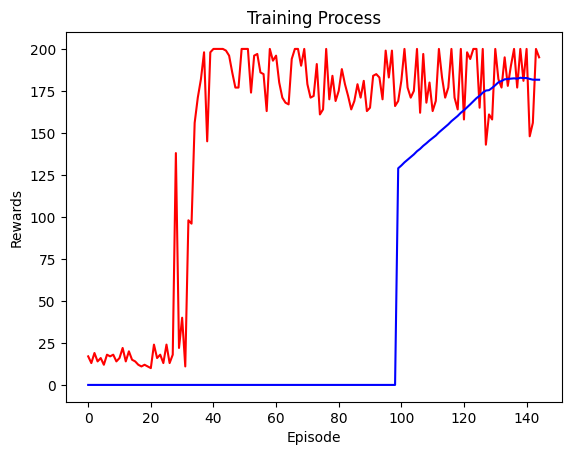

In [ ]:
# We are training our model
Train_model = Train(env, n_obs, n_actions, device)
Train_model.train(500)

In [ ]:
def evaluate(env, Train_model, n_games=1, t_max=100000):
    """ Plays n_games full games. If greedy, picks actions as argmax(qvalues). Returns mean reward. """
    rewards = []
    for _ in range(n_games):
        s = env.reset()
        reward = 0
        for _ in range(t_max):
            action = Train_model.agent.step(s, Train_model.behave_DQN, env, True)
            s, r, done, _ = env.step(action)
            reward += r
            if done:
              break

        rewards.append(reward)
    return np.mean(rewards)

In [ ]:
# run sessions

import gym.wrappers
import sys
from pathlib import Path
from base64 import b64encode
from IPython.display import HTML

n_games = 1 # how many games to record

with gym.wrappers.Monitor(make_env(), directory="videos", force=True) as env_monitor:
    env_monitor.reset()
    sessions = [evaluate(env_monitor, Train_model, n_games=1) for _ in range(1)]


In [ ]:
# show video

video_paths = sorted([s for s in Path('videos').iterdir() if s.suffix == '.mp4'])
video_path = video_paths[1]  # You can also try other indices (if n_games>1)

if 'google.colab' in sys.modules:
    # https://stackoverflow.com/a/57378660/1214547
    with video_path.open('rb') as fp:
        mp4 = fp.read()
    data_url = 'data:video/mp4;base64,' + b64encode(mp4).decode()
else:
    data_url = str(video_path)

HTML("""
<video width="640" height="480" controls>
  <source src="{}" type="video/mp4">
</video>
""".format(data_url))

#The Output
The Grpah of rewards over episodes:

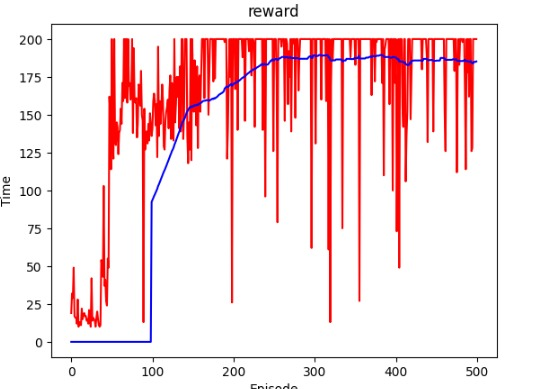

A link for the video:

https://youtu.be/DGsm_qLjHQs
